<a href="https://colab.research.google.com/github/H3nr7M/machine_learning_101/blob/main/Machine_learning_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial intelligence
Artificial intelligence leverages computers and machines to mimic the problem-solving and decision-making capabilities of the human mind. Artificial intelligence is a field that combines computer science and robust datasets to enable problem-solving. Expert systems, an early successful application of AI, aimed to copy a human’s decision-making process. In the early days, it was time-consuming to extract and codify the human’s knowledge. AI today includes the sub-fields of machine learning and deep learning, which are frequently mentioned in conjunction with artificial intelligence.

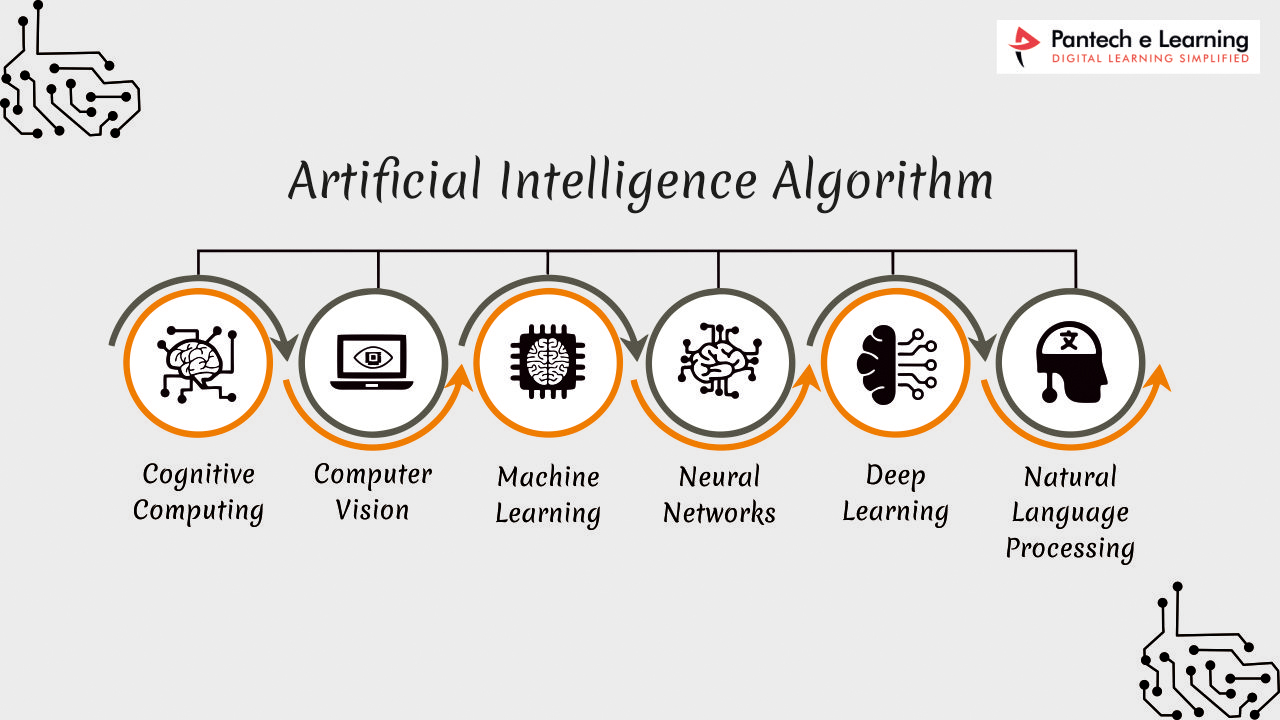

##Machine learning
Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so. Classical machine learning is often categorized by how an algorithm learns to become more accurate in its predictions. There are four basic approaches:supervised learning, unsupervised learning, semi-supervised learning and reinforcement learning. 

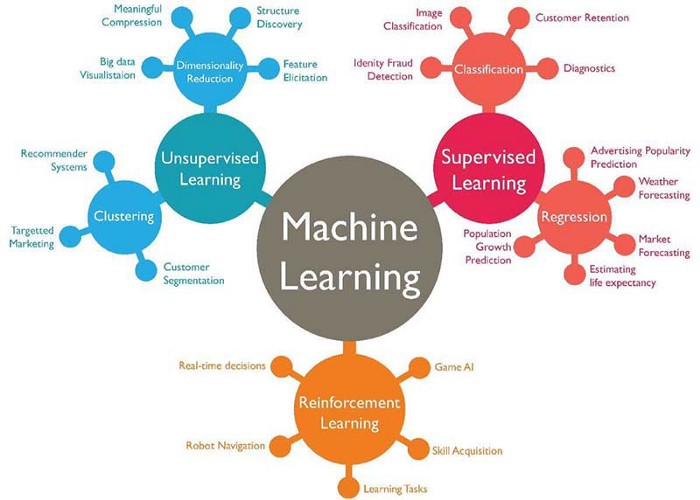

###Supervised learning
In this type of machine learning, data scientists supply algorithms with labeled training data and define the variables they want the algorithm to assess for correlations. Both the input and the output of the algorithm is specified, types of tasks supervised learning can solve and their algorithms.

* Binary classification: Dividing data into two categories.
* Multi-class classification: Choosing between more than two types of answers.
* Regression modeling: Predicting continuous values.

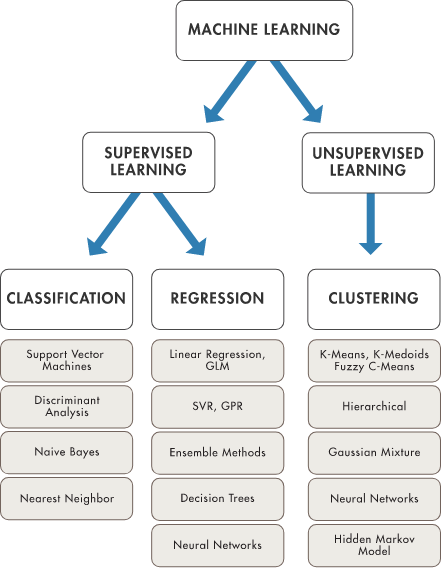


#Procesing data
The purpose of processing the data prior to training our ML model is to adjust the data to its input and eliminate values that produce errors when making a prediction. Said processing consists of:

* Manage missings values
* Label encoding
* Handle inbalanced datasets
* Standardization of the data
* Split our dataset

##Manage missings values

In [2]:
!git clone https://github.com/H3nr7M/pre-procesing.git

Cloning into 'pre-procesing'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
!pwd

/content


In [5]:
# loading the dataset to a Pandas DataFrame
dataset = pd.read_csv('/content/pre-procesing/Placement_Dataset.csv')

In [6]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


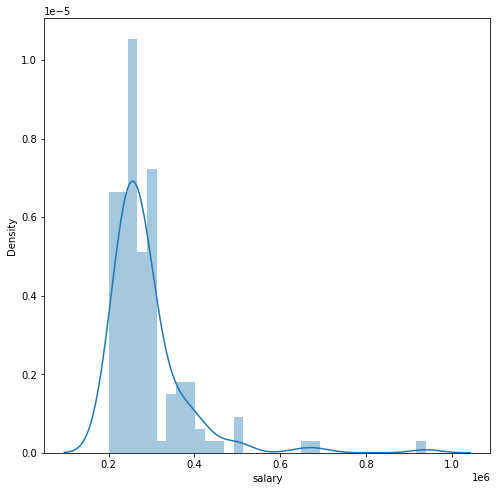

In [7]:
# analyse the distribution of data in the salary
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(dataset.salary)

Ways to fix missings values

In [8]:
dataset['salary'].fillna(dataset['salary'].median(),inplace=True) 
# dataset['salary'].fillna(dataset['salary'].mean(),inplace=True) 
# dataset['salary'].fillna(dataset['salary'].mode(),inplace=True)
#dataset = dataset.dropna(how='any')

In [9]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

##Label Encoding

In [10]:
# loading the data from csv file to pandas dataFrame
cancer_data = pd.read_csv('/content/pre-procesing/data.csv')

In [11]:
# finding the count of different labels
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
# load the Label Encoder function
label_encode = LabelEncoder()
labels = label_encode.fit_transform(cancer_data.diagnosis)
# appending the labels to the DataFrame
cancer_data['target'] = labels

In [13]:
cancer_data['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

##Handle inbalanced datasets

In [16]:
# separating the legit and fraudulent transactions
fine = cancer_data[cancer_data.target == 0]
wrong = cancer_data[cancer_data.target == 1]
fine_sample = fine.sample(n=212)
new_dataset = pd.concat([fine_sample, wrong], axis = 0)
new_dataset['target'].value_counts()

0    212
1    212
Name: target, dtype: int64

##Standardization of the data

In [17]:
# loading the dataset
dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
X = df 
Y = dataset.target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
print(dataset.data.std())

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [ ]:
print(X_train_standardized.std())
print(X_test_standardized.std())

##Split our dataset

In [ ]:
# loading the data from csv file to pandas dataFrame
iris_data = pd.read_csv('/content/pre-procesing/iris_data.csv')

In [ ]:
# getting the statistical measures of the data
iris_data.describe()
# number of rows and Columns in this dataset
iris_data.shape

In [ ]:
iris_data.head()

In [ ]:
# loding the label encoder
label_encoder_1 = LabelEncoder()
iris_labels = label_encoder_1.fit_transform(iris_data.Species)

In [ ]:
iris_data['target'] = iris_labels
iris_data.groupby('target').mean()

In [ ]:
iris_data.head()

In [ ]:
# separating the data and labels
iris_data1= iris_data.drop(columns = 'Species', axis=1)
X=iris_data1.drop(columns='target',axis=1)
Y = iris_data['target']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

#Deep learning
Deep learning is a subset of machine learning, which is essentially a neural network with three or more layers. These neural networks attempt to simulate the behavior of the human brain. Deep learning eliminates some of data pre-processing that is typically involved with machine learning. These algorithms can ingest and process unstructured data, like text and images, and it automates feature extraction, removing some of the dependency on human experts. 

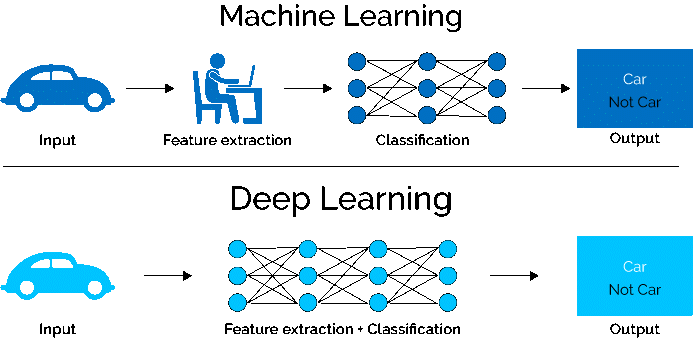